## Start the spark session

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
        .config("spark.cores.max", "4") \
        .master('spark://b2-120-gra11:7077') \
        .getOrCreate()
spark

22/12/06 11:05:12 WARN Utils: Your hostname, b2-120-gra11 resolves to a loopback address: 127.0.1.1; using 141.94.168.194 instead (on interface ens3)
22/12/06 11:05:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/06 11:05:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/12/06 11:05:18 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/12/06 11:05:18 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


## Load the data

- Here we read the NYC taxi data files of year 2018 and select some variables.

In [2]:
columns = ['tpep_pickup_datetime', 'passenger_count', 'payment_type', 'fare_amount', 
           'tip_amount', 'total_amount']
df = (spark.read.parquet("hdfs://localhost:54310/data/nyctaxi/2018.parquet/").select(*columns))

1. Plot the tip_fraction as a function of the hour of day 

<AxesSubplot: xlabel='hour_of_day'>

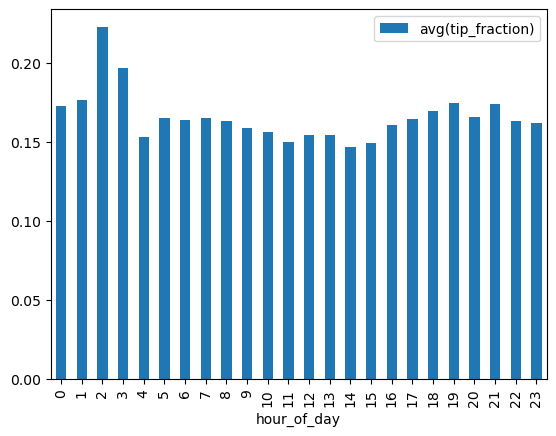

In [3]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import * # Importing PySpark functions

results = (df.filter(df.fare_amount > 0)
   .withColumn('tip_fraction', df.tip_amount / df.fare_amount)
   .withColumn('hour_of_day', hour(df.tpep_pickup_datetime))
   .groupBy("hour_of_day")
   .agg({'tip_fraction': 'avg'})
   .orderBy("hour_of_day")
   .toPandas()
)
results.plot(x = "hour_of_day", y = "avg(tip_fraction)", kind="bar")

2. Same plot for the day of the week?

In [ ]:
# ...

3. Investigate the `payment_type` column.  See how well each of the payment types correlate with the `tip_fraction`.  Did you find anything interesting?  Any guesses on what the different payment types might be?  If you're interested you may be able to find more information on the [NYC TLC's website](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml)

### Cheat Sheets and documentation

- [Spark DataFrames in Python](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PySpark_SQL_Cheat_Sheet_Python.pdf)
- [Spark in Python](http://datacamp-community.s3.amazonaws.com/4d91fcbc-820d-4ae2-891b-f7a436ebefd4)
-  https://spark.apache.org/docs/latest/api/python/pyspark.sql.html

Use the [PySpark API](https://spark.apache.org/docs/latest/api/python/index.html).